In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
head1 = threeD_head.read_from_file(1,3)
head2 = threeD_head.read_from_file(1,4)

In [10]:
head1.full_filter()
head2.full_filter()

depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.


In [ ]:
head1 = threeD_head.load_from_pickle(1,1)
head2 = threeD_head.load_from_pickle(1,2)

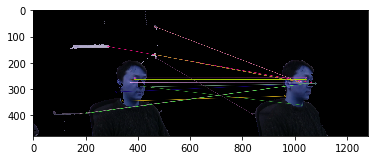

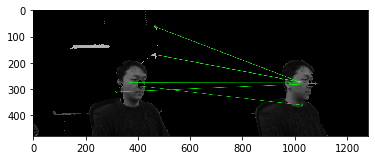

[[ 0.12713062 -0.11479237 -0.12503678]
 [ 0.54549662 -0.46890737  1.29896322]
 [ 0.54549662 -0.46890737  1.29896322]
 [ 0.54549662 -0.46890737  1.29896322]
 [ 0.54865062 -0.88095737  1.27996322]
 [ 0.54865062 -0.88095737  1.27996322]]
[[ 0.07557263  0.01404159  0.08881955]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]]


In [68]:
mhead = MultiHead.joined_heads(head1,head2)

In [55]:
mhead.icp_transform(0,1)

0
found the best fit transform 0
found the best fit transform 1
hallo


In [2]:
for i in range(1,16):
    head1 = HEAD_RECON.threeD_head.read_from_file(2,i)
    head1.full_filter()
    head1.create_vpython_spheres()
    head1.save()

depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.


In [56]:
for i in range(1,16):
    head1 = HEAD_RECON.threeD_head.read_from_file(3,i)
    head1.full_filter()
    head1.create_vpython_spheres()
    head1.save()

depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.


In [158]:
for i in range(10,16):
    head1 = HEAD_RECON.threeD_head.read_from_file(4,i)
    head1.full_filter()
    head1.create_vpython_spheres()
    head1.save()

depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.


In [105]:
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [109]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
# head1.paint([0,1,0])
# head2.paint([0,0,1])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        heads.join_heads(i-1,i)
        heads.icp_transform(i-1,i)
    heads.save(sparcity=0.3) 

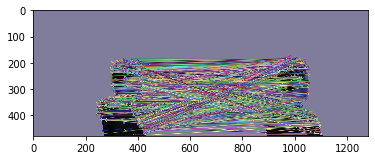

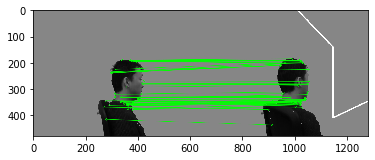

ids are not unique
1 [-0.0081489   0.03034624  0.01053501]
step:  0 before:  0.018335496635829642
found the best fit transform 0


In [114]:
make_mhead(all_heads,5,6)

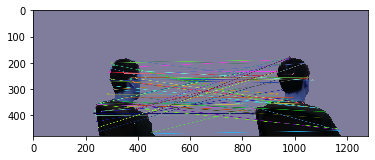

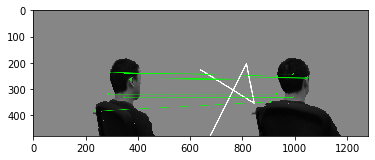

1 [-0.03647688  0.01731819  0.01977256]
step:  0 before:  0.014321179118535678
found the best fit transform 0


In [140]:
# contrastThreshold = 0.04,edgeThreshold=20,sigma = 2
make_mhead(all_heads,6,7)

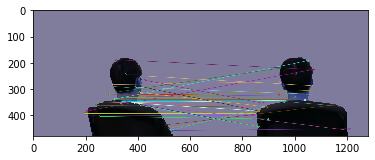

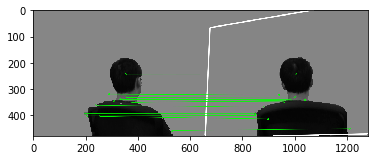

1 [ 0.00581872  0.00856388 -0.00318661]
step:  0 before:  0.017243637358504146
found the best fit transform 0


In [145]:
# contrastThreshold = 0.04,edgeThreshold=20,sigma = 4
make_mhead(all_heads,7,8)

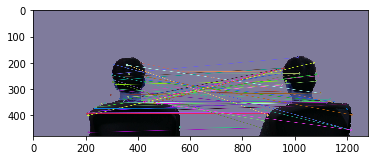

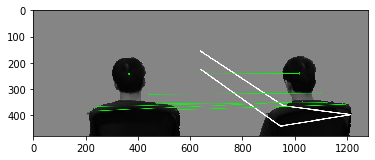

ids are not unique
1 [-0.01179951 -0.0003952  -0.0297237 ]
step:  0 before:  0.0330214987419849
found the best fit transform 0
step:  1 before:  0.016377419358178377
found the best fit transform 1
step:  2 before:  0.01142196017205387
found the best fit transform 2


In [66]:
make_mhead(all_heads,8,9)

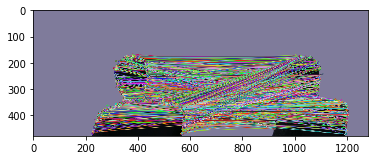

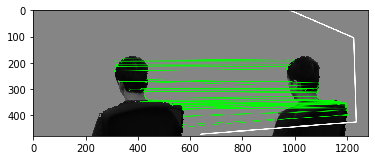

1 [-0.01469043 -0.02257988 -0.02900913]
step:  0 before:  0.029039639842587357
found the best fit transform 0
step:  1 before:  0.017743533328097107
found the best fit transform 1
step:  2 before:  0.01344478715872138
found the best fit transform 2


In [153]:
# max_iterations=3,contrastThreshold = 0.04,edgeThreshold=20,sigma = 0.5
make_mhead(all_heads,9,10)

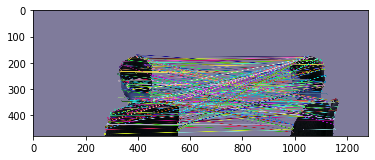

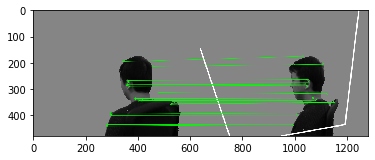

ids are not unique
1 [-0.07013403 -0.04531545 -0.01377103]
step:  0 before:  0.04949234354126226
found the best fit transform 0
step:  1 before:  0.03699278694581926
found the best fit transform 1
step:  2 before:  0.03551419975368493
found the best fit transform 2


In [157]:
# contrastThreshold = 0.02,edgeThreshold=10,sigma = 1
make_mhead(all_heads,10,11)

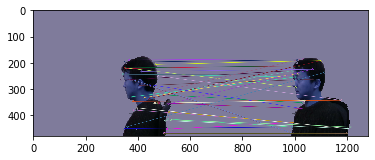

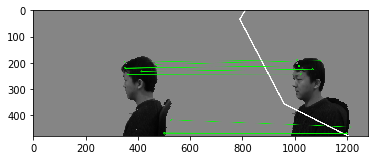

ids are not unique
1 [-0.02083167  0.03074709  0.01132438]
step:  0 before:  0.013714677102777788
found the best fit transform 0
step:  1 before:  0.012248245139960234
found the best fit transform 1
step:  2 before:  0.011659397377062097
found the best fit transform 2


In [32]:
make_mhead(all_heads,11,12)

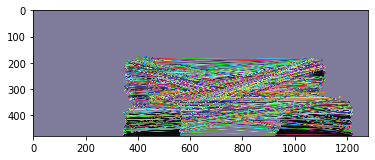

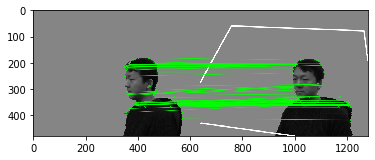

ids are not unique
1 [-0.02714347  0.03641988  0.00735536]
step:  0 before:  0.01968933621206362
found the best fit transform 0


In [103]:
# contrastThreshold = 0.02,edgeThreshold=10,sigma = .51
make_mhead(all_heads,12,13)

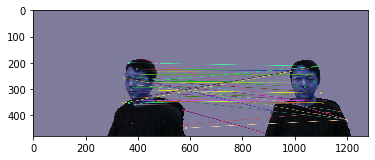

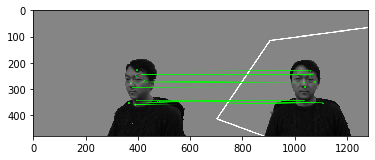

ids are not unique
1 [-0.02660348  0.0163115   0.01360276]
step:  0 before:  0.01559313928058618
found the best fit transform 0
step:  1 before:  0.012678964446282467
found the best fit transform 1
step:  2 before:  0.01201065855249096
found the best fit transform 2


In [25]:
make_mhead(all_heads,13,14)

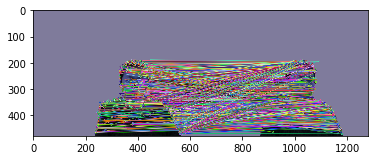

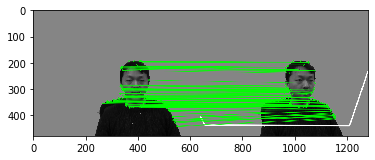

ids are not unique
1 [-0.01443877 -0.003135   -0.00552526]
step:  0 before:  0.012932745740076931
found the best fit transform 0
2


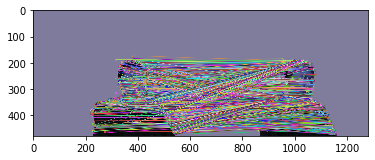

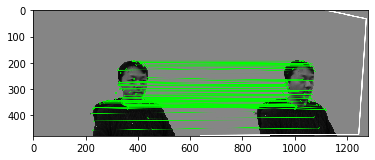

ids are not unique
1 [-0.03478402 -0.00452517  0.00160488]
step:  0 before:  0.010420832448668703
found the best fit transform 0
3


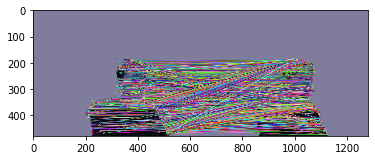

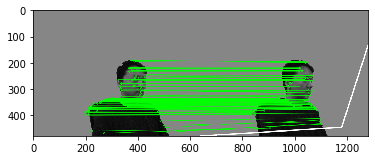

ids are not unique
1 [-0.05606963 -0.00906409  0.01156961]
step:  0 before:  0.007720048791072552
found the best fit transform 0
4


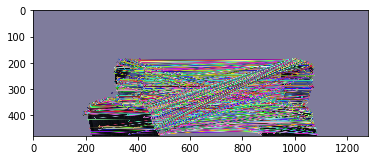

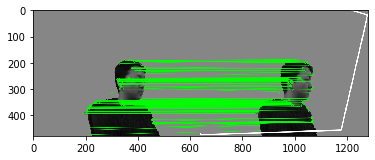

ids are not unique
1 [-0.0713724  -0.01860519  0.01651543]
step:  0 before:  0.012211478297797942
found the best fit transform 0
5


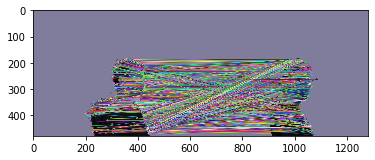

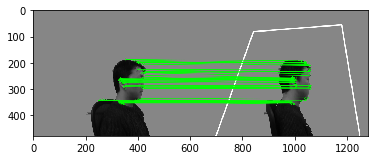

ids are not unique
1 [-0.1004153  -0.03505054  0.03852293]
step:  0 before:  0.01962124912573829
found the best fit transform 0
6


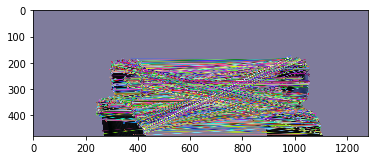

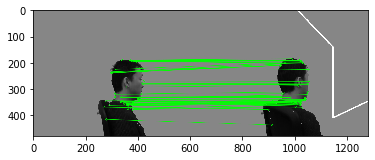

ids are not unique
1 [-0.08890301 -0.00643153  0.04464584]
step:  0 before:  0.018072044622862306
found the best fit transform 0
7


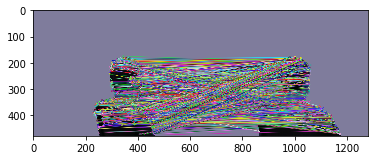

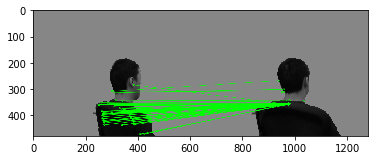

ids are not unique
1 [-0.04200047  0.03624294  0.07493119]
step:  0 before:  0.04997067410732014
found the best fit transform 0
8


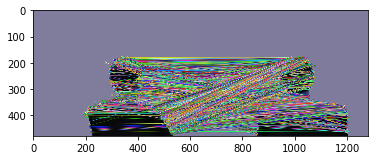

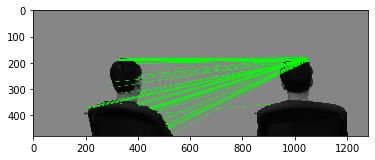

ids are not unique
1 [ 0.18705228 -0.01979955  0.08100932]
step:  0 before:  0.12707587524423963
found the best fit transform 0
9


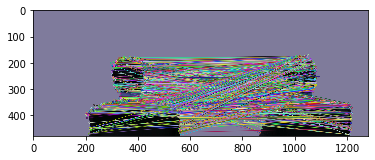

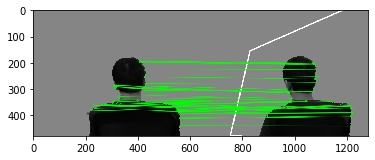

ids are not unique
1 [ 0.13819528 -0.02389863  0.13416506]
step:  0 before:  0.015245554794503898
found the best fit transform 0
10


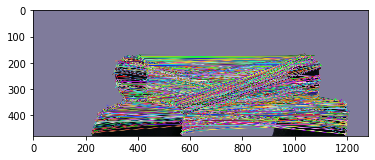

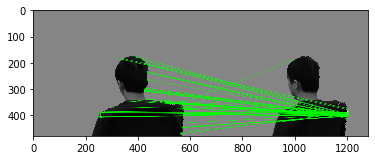

ids are not unique
1 [-0.08248445 -0.18699023  0.0835333 ]
step:  0 before:  0.11467894604670305
found the best fit transform 0
11


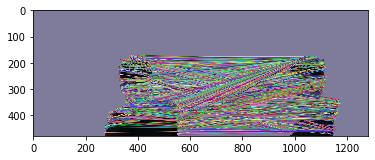

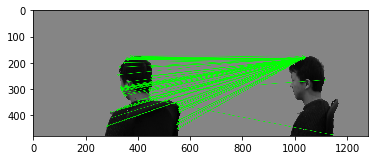

ids are not unique
1 [-0.16355534 -0.25569881 -0.0498761 ]
step:  0 before:  0.08170954825661872
found the best fit transform 0
12


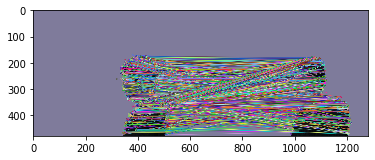

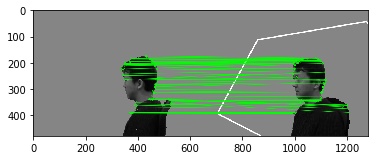

ids are not unique
1 [-0.20803166 -0.12529134 -0.05488666]
step:  0 before:  0.05972129021537864
found the best fit transform 0
13


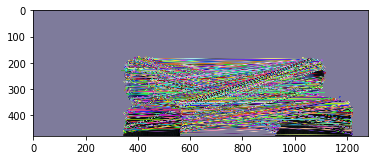

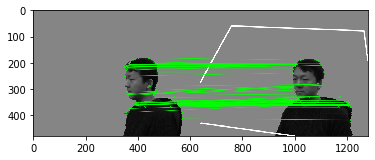

ids are not unique
1 [-0.24089223 -0.11997661 -0.09121579]
step:  0 before:  0.01953416321245607
found the best fit transform 0
14


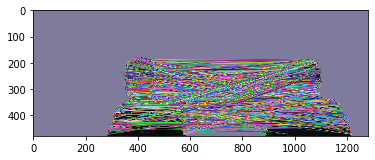

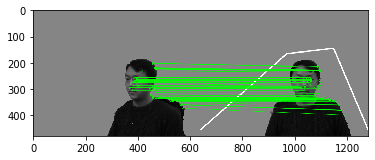

ids are not unique
1 [-0.25604648 -0.14341082 -0.10859895]
step:  0 before:  0.02544029233111164
found the best fit transform 0


In [113]:
make_mhead(all_heads,0,14)

5,6 works when matching ratio is low
6,7 works when matching ratio is high